# Project: Wrangling and Analyze Data

Welcome, this project is about a twitter account that goes by the user name WeRateDogs it rates people's dogs with a humorous comment. It rates dogs with a scale of 1-10 however sometimes the rating is in excess of the maximum value of 10. First is to gather the data, assess and then analyze it. Lets dive in.

import the libraries to be used to gather,assess and analyze the data.

In [ ]:
import pandas as pd
import numpy as np
import requests
from timeit import default_timer as timer 
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

: 

## <u>GATHERING DATA<u>

Reading of the twitter-archive-enhanced dataset

In [2]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd,'twitter-archive-enhanced.csv'))
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.shape

(2356, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Using the Tweepy libray to gather and query Twitter API for additional data.

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Query of twitter API

tweet_ids = api.get_status(tweet_id, tweet_mode='extended')
print(tweet_ids)

NameError: name 'tweet_id' is not defined

In [ ]:
tweet_ids = df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

Saving the results from the Twitter API in a JSON text and creating a new dataframe

In [ ]:
new_tweet_df = pd.read_json('tweet_json.txt',lines=True)

In [ ]:
new_tweet_df.shape

(2326, 32)

In [ ]:
new_tweet_df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


Using the open function to read the JSON file and gathering the retweet and favorite counts and saving it in a new dataframe.

In [ ]:
tweet_df = []
with open('tweet_json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        
        tweet_id = data['id']
        retweet_count= data['retweet_count']
        favorite_count = data['favorite_count']
        created_at = data['created_at']
        tweet_df.append({
             'tweet_id' :  tweet_id ,
            'retweet_count': retweet_count,
            'favorite_count':favorite_count,
            'created_at':created_at,
        })
        
new_tweet_df = pd.DataFrame(tweet_df,columns=['tweet_id','created_at','retweet_count','favorite_count'])

In [ ]:
new_tweet_df

,tweet_id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6975,33711
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5276,29237
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3466,21981
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7197,36810
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7721,35196
...,...,...,...,...
2321,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,36,88
2322,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,115,246
2323,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,36,100
2324,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,39,112


Using Requests library to read gathered additional data from URL

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)

<Response [200]>


Reading the data gathered from the URL 

In [ ]:
df_url = pd.read_csv(url,sep='\t')

In [ ]:
df_url

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## <u>ASSESSING DATA<u>

Assessing the data visually to get acquinted using `.head()`and `.tail()`. In order to see the data in it's entirety I used a spreadsheet program.

In [ ]:
# first 60 results
df.head(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [ ]:
# last 60 results
df.tail(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2299,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None
2301,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality issues


1. O'malley spelled as O.
2. Combination of upper and lower cases in the dog name Dayz.
3. Name GÃ²rdÃ³n typed with special characters.
4. Name DevÃ³n pronounced as 'Eric' written with special characters. 
5. The dog name RalphÃ© has special characters
6. The dog name FlÃ¡vio has special characters
7. Name FrÃ¶nq typed with special characters.
8. The dog name AmÃ©lie typed with special charcters
9. Name OliviÃ©r typed with special characters.
10.Invalid names, which are not dog names such as such,just,a,old 
11.Time-stamp data-type indicated as object, should be of type datatime.

### Tidy issues
1. The dog stages doggo,floofer,pupper and puppo should be combined in one column.
2. We rate dogs is about tweets the data is spread across 3 sources needed to be merged in one dataset.


## <u>CLEANING DATA<u>

In [ ]:
# Make copies of the original data pieces
df_clean_twitter = df.copy()

### Issue 1 :O'malley spelled as O.


#### Define: 
The dog name O'malley is mispelled as O,the text column reads as O'malley. Replace it with the appropriate dog_name as it reads in the text column.

#### Code:



In [ ]:
df_clean_twitter.name = df_clean_twitter.name.replace('O','Omalley')

#### Test:

In [ ]:
df_clean_twitter[df_clean_twitter['name'] == 'Omalley']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,Omalley,None,None,None,None


### Test:

### Issue 2: Combination of upper and lower cases in the dog name Dayz.

#### Define:
The dog name DayZ has combined uppercase and lowercase, it needs to be Dayz

#### Code:


In [ ]:
# convert letter Z to lowercase
df_clean_twitter.name = df_clean_twitter.name.replace('DayZ','Dayz')

#### Test:

In [ ]:
df_clean_twitter[df_clean_twitter['name'] == 'Dayz']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,Dayz,None,None,None,None


### Issues 3 upto 9
It deals with all the dog names with non-ascii characters, first is to reomve all the non-ascii characters from the `Name` column and replace each name with a name that's readable and where necessary replace the name.

In [ ]:
# remove all the non-ascii characters in the NAME column
df_clean_twitter['name'] = df_clean_twitter['name'].str.encode('ascii', 'ignore').str.decode('ascii')

### Issue 3: Name GÃ²rdÃ³n typed with special characters.

#### Define: 
The dog name GÃ²rdÃ³n typed with non-ascii characters Ã,² ³ is not readable with the characters. According to the text column it reads Gordon as the name of the dog.

#### Code`

In [ ]:
# replace dog name Grdn with Gordon
df_clean_twitter.name = df_clean_twitter.name.replace('Grdn','Gordon')

#### Test:

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Gordon']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
2217,668528771708952576,NaN,NaN,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gòrdón. He enjoys his razberrita by po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668528771...,12,10,Gordon,None,None,None,None


### Issue 4: Name DevÃ³n typed with special characters.

#### Define:
The dog name DevÃ³n is not possible to read or pronounce with the non-ascii characters, but the text column has gives the name as Devon 

#### Code:

In [ ]:
# replace Devn with Devon
df_clean_twitter.name = df_clean_twitter.name.replace('Devn','Devon')

#### Test:

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Devon']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devon,None,None,None,None


### Issue 5:The dog name RalphÃ© has special characters

#### Define
The dog name RalphÃ© which reads as Ralph has already stripped the non-ascii characters. There's no need to replace it.

#### Test :

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Ralph']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralph,None,None,None,None
1780,677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None


### Issue 6 : The dog name FlÃ¡vio has special characters

#### Define :
The dog name FlÃ¡vio typed with non-ascii characters looks like this when stripped `Flvio` it also reads as Flavio in the text column. It needs to be replaced with the correct name `Flavio`

#### Code

In [ ]:
# replace Flvio to read Flavio
df_clean_twitter.name = df_clean_twitter.name.replace('Flvio','Flavio')

#### Test

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Flavio']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717047459...,12,10,Flavio,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flavio,None,None,None,None


### Issue 7 : Name FrÃ¶nq typed with special characters.

#### Define :
The dog name  `FrÃ¶nq` clearly its impossible to pronounce it.But the text column gives the hint of `Fronq`  which can be pronounced as Frank, since it's a dog name we'll stick with `Fronq`

#### Code 

In [ ]:
# replace  FrÃ¶nq with Fronq
df_clean_twitter.name = df_clean_twitter.name.replace('Frnq','Fronq')

#### Test

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Fronq']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Fronq,None,None,None,None


### Issue 8: The dog name AmÃ©lie typed with special characters.

#### Define: 
AmÃ©lie another dog name that has been typed with non-ascii characters, impossible to read and pronounce the text column reads `Amelie` 

#### Code 

In [ ]:
# replace Amlie to Amelie
df_clean_twitter.name = df_clean_twitter.name.replace('Amlie','Amalie')

#### Test

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Amalie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amalie,None,None,None,None


### Issue 9 : Name OliviÃ©r typed with special characters.

#### Define :
The dog name `OliviÃ©r` is another name that has non-ascii characters impossible read and pronounce, unless one reads it from the text column `Olivier` which is the correct name.

#### Code

In [ ]:
# replace OliviÃ©r with Olivier
df_clean_twitter.name = df_clean_twitter.name.replace('Olivir','Olivier')

#### Test

In [ ]:
df_clean_twitter[df_clean_twitter['name']=='Olivier']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Olivier,None,None,None,None
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliviér. He's a Baptist Hindquarter. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483...,10,10,Olivier,None,None,None,None


### Issue 10: Timestamp data-type indicated as object, should be of type datatime.

#### Define:
In the tweet-archive data the tweet timestamp should be datetime type, but it's indicated as a string object

#### Code: 

In [ ]:
df_clean_twitter['timestamp'] = pd.to_datetime(df_clean_twitter['timestamp'])

#### Test:

In [ ]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue 10 : Invalid names, which are not dog names such as such,just,a,old  etc

#### Define :
The Name column has dog names that are not the typical do names or names generally for example such,light,quite, a, an. This names are to be replaced with NaN.

#### Code

In [ ]:
# replacing wrong names in Name columns with NaN
wrong_names = ['a','just','the','getting','quite','one','an','by','space','actually','infuriating','light','life','all',
              'unacceptable','old']

for element in wrong_names:
    df_clean_twitter['name'] = df_clean_twitter['name'].replace(element,np.nan)
    

#### Test

In [ ]:
df_clean_twitter['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2356, dtype: object

## Tidiness

### Issue 1 : The dog stages doggo,floofer,pupper and puppo should be combined in one column.

#### Define :
Since column names doggo, floofer, pupper, puppo all represents dog stages. It's prudent to combine the columns into one column 
`dog_stage` because they are the same observation.

### Code

In [ ]:
# make copy of the df_clean_twitter
df2 = df_clean_twitter.copy()

#####  Creating a new column named dog_stage, using string concatination to combine the doggo,floofer,pupper and puppo.

In [ ]:
# concatination of the columns
df2['dog_stage'] = df2['doggo']+','+df2['floofer']+','+df2['pupper']+','+df2['puppo']

##### The result from the concatination `None,None,None,doggo` in the dog_stage should be cleaned to either the dog_stage or an empty cell.

In [ ]:
# remove None from None,None,None,doggo
df2['dog_stage'] = df2.dog_stage.str.replace('None',' ')

#### Remove comma that's  a result of concatination and replace it with `' '`.

In [ ]:
df2['dog_stage'] = df2.dog_stage.replace(',',' ', regex=True)

##### After removing the `None` and the comma there is whitespace on the start and end of a string in the dog_stage column

In [ ]:
# remove the whitespace in the dog_stage column per cell
df2['dog_stage'] = [x.strip() for x in df2['dog_stage']]

#### What's remaining in the dog_stage column is the stage which each dog belongs to and an empty cell, since `None` was replaced by `' '`.

In [ ]:
# Replace the empty cells in dog_stage column with NaN
df2.dog_stage.replace('',np.nan,inplace=True)

Drop the doggo, floofer, pupper, puppo columns

In [ ]:
df2.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [ ]:
df2['dog_stage']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: dog_stage, Length: 2356, dtype: object

### Issue 2 : We rate dogs is about tweets the data is spread across 3 sources needed to be merged in one dataset.


#### Define : 
The we rate dogs is spread across 3 datasets the twitter-archive, image prediction and the gathered data from the twitter API. Since the datasets relates to we rate dogs it should be merged to create one dataset.

#### Code :

merging copies of cleaned and gathered dataframes

In [ ]:
df3 = pd.merge(df2,new_tweet_df[['retweet_count','favorite_count','tweet_id']],on='tweet_id',how='outer')

merging URL data and the cleaned and gathered dataframes

In [ ]:
clean_twitter_df = pd.merge(df3,df_url[['tweet_id','jpg_url']],on='tweet_id',how='outer')

#### Test:

In [ ]:
clean_twitter_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,NaN,4880.0,0.0,NaN


## <u>STORE AND ANALYSE<u>

In [ ]:
clean_twitter_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Vizualizing Data

Welcome to the analyzing and vizualing section where we get to draw insights and create visuals from the already cleaned data. First we need to read the dataset.

***Wrangling is iterative***
The already gathered, assessed, cleaned and stored will also be assessed and cleaned in the analysis. Such as dropping columns that are not doing to be used in the analysis, dropping duplicates and nulls.


In [ ]:
# read the data from csv file
rate_dog = pd.read_csv('twitter_archive_master.csv')
rate_dog.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6975.0,33711.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5276.0,29237.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3466.0,21981.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7197.0,36810.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg


In [ ]:
rate_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2262 non-null   object 
 13  dog_stage                   380 n

Drop the columns that are not going to be used in the analysis

In [ ]:
rate_dog.drop(['name','in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id',
              'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator',
              'jpg_url'],axis=1,inplace=True)

The timestamp which is of datetime module is indicated as an object data type, covert it to datetime.

In [ ]:
rate_dog['timestamp'] = rate_dog['timestamp'].astype('datetime64[ns]')

In [ ]:
# confirm changes
rate_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2356 non-null   int64         
 1   timestamp       2356 non-null   datetime64[ns]
 2   text            2356 non-null   object        
 3   dog_stage       380 non-null    object        
 4   retweet_count   2326 non-null   float64       
 5   favorite_count  2326 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 110.6+ KB


Remove duplicates and null from the retweet and favorite column

In [ ]:
# check for duplicates retweet column
rate_dog['retweet_count'].duplicated().sum()

709

In [ ]:
# check for duplicates favorite column
rate_dog['favorite_count'].duplicated().sum()

380

In [ ]:
# drop duplicates
rate_dog.drop_duplicates(subset=['retweet_count','favorite_count'],keep=False)

,tweet_id,timestamp,text,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,6975.0,33711.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,5276.0,29237.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,3466.0,21981.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,7197.0,36810.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,7721.0,35196.0
...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,NaN,36.0,88.0
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,NaN,115.0,246.0
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,NaN,36.0,100.0
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,NaN,39.0,112.0


After merging the dataframes there were NaNs since they were not of the same shape, find all the NaNs in the retweet and favorite count columns and drop them.

In [ ]:
# chech for null retweet column
rate_dog['retweet_count'].isnull().sum()

30

In [ ]:
# check for null favorite column
rate_dog['favorite_count'].isnull().sum()

30

In [ ]:
3# drop nulls
rate_dog = rate_dog.dropna(subset=['retweet_count','favorite_count'])

In [ ]:
# confirm changes of no null
rate_dog['favorite_count'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: favorite_count, Length: 2326, dtype: bool

In [ ]:
# confirm changes of no null
rate_dog['retweet_count'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: retweet_count, Length: 2326, dtype: bool

There is an issue that needs correction, retweet and favorite counts are floats instead of integers datatype. Also removing the zero decimal at the end.

In [ ]:
# convert the dtype of the retweet column
rate_dog['retweet_count'] = rate_dog['retweet_count'].astype('int32')

In [ ]:
# confirm changes
rate_dog['retweet_count']

0       6975
1       5276
2       3466
3       7197
4       7721
        ... 
2351      36
2352     115
2353      36
2354      39
2355     420
Name: retweet_count, Length: 2326, dtype: int32

In [ ]:
# convert the dtype of the retweet column
rate_dog['favorite_count'] = rate_dog['favorite_count'].astype('int32')

In [ ]:
# confirm changes
rate_dog['favorite_count']

0       33711
1       29237
2       21981
3       36810
4       35196
        ...  
2351       88
2352      246
2353      100
2354      112
2355     2285
Name: favorite_count, Length: 2326, dtype: int32

In [ ]:
rate_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2326 non-null   int64         
 1   timestamp       2326 non-null   datetime64[ns]
 2   text            2326 non-null   object        
 3   dog_stage       375 non-null    object        
 4   retweet_count   2326 non-null   int32         
 5   favorite_count  2326 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 109.0+ KB


In [ ]:
rate_dog.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418030e+17,2460.914015,7032.638865
std,6.822091e+16,4167.380405,10927.298272
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,492.250000,1219.500000
50%,7.178159e+17,1145.500000,3041.000000
75%,7.986600e+17,2847.500000,8576.000000
max,8.924206e+17,70383.000000,144338.000000


### Insights
1. Which dog stage gets most interation from users?
2. Is there a correlation between retweets and favorites?
3. What's the trend of retweets and favorites over time?


### Insight 1
Which dog stage gets most interation from users?

In [ ]:
# remove cojoined dog stage # example doggo,puppo
rate_dog['dog_stage'] = rate_dog['dog_stage'].str.split().str[-1]

In [ ]:
# check for duplicates
rate_dog['dog_stage'].duplicated().sum()

2321

In [ ]:
# drop null
rate_dog = rate_dog.dropna(subset=['dog_stage'])

In [ ]:
rate_dog['dog_stage'].isnull().any()

False

In [ ]:
rate_dog.drop_duplicates('dog_stage')

,tweet_id,timestamp,text,dog_stage,retweet_count,favorite_count
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,doggo,6074,27857
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,puppo,8306,41892
29,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,pupper,2614,18495
46,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofe...,floofer,3061,19883


In [ ]:
retweet_dog_stage = rate_dog.groupby('dog_stage')['retweet_count'].sum()

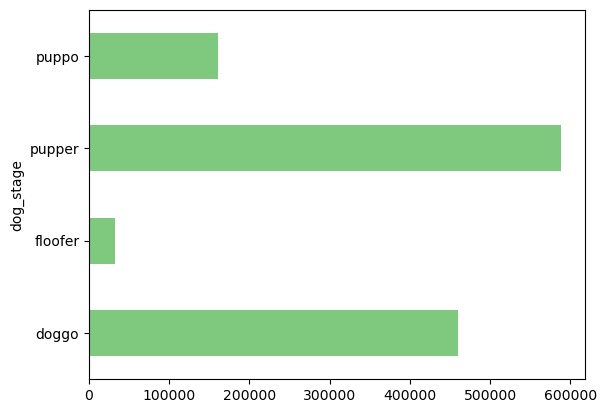

In [ ]:
retweet_dog_stage.plot(kind='barh', cmap='Accent');

In [ ]:
favorite_dog_stage = rate_dog.groupby('dog_stage')['favorite_count'].sum()

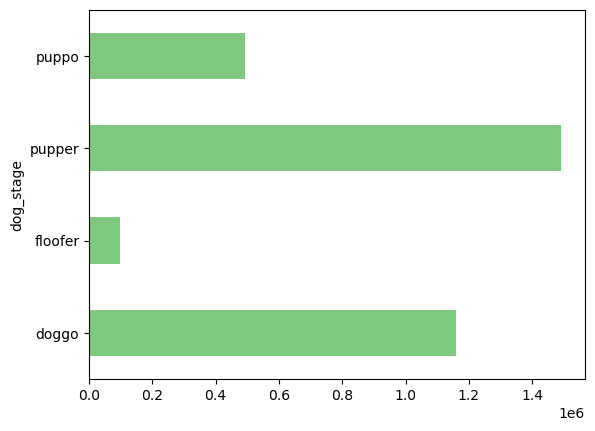

In [ ]:
favorite_dog_stage.plot(kind='barh',cmap='Accent');

### Insight 2
What is the distribution of retweets and favorites, and is there a correlation?

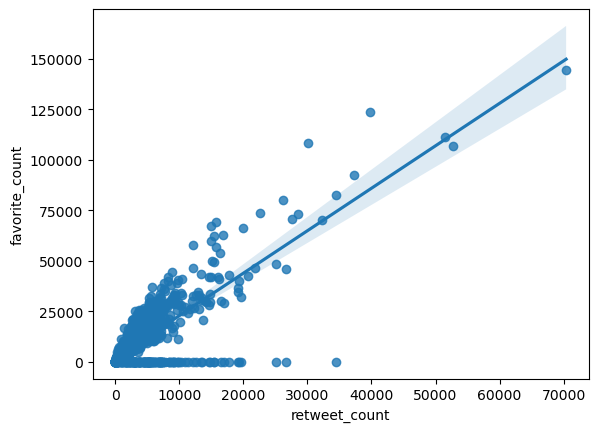

In [ ]:
sns.regplot(x=rate_dog.retweet_count, y=rate_dog.favorite_count);

C:\Users\user\miniconda3\envs\twitter_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


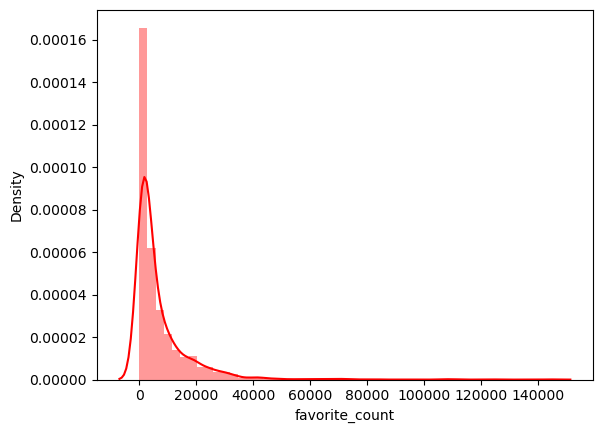

In [ ]:
sns.distplot(rate_dog.favorite_count,color='red',label='Favorites');

C:\Users\user\miniconda3\envs\twitter_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


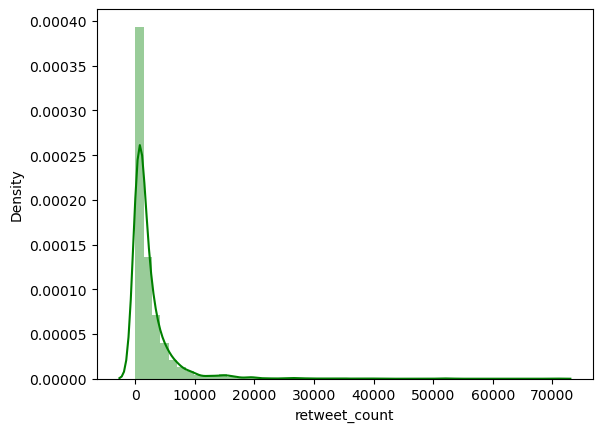

In [ ]:
sns.distplot(rate_dog.retweet_count,color='green',label='Favorites');

### Insight 3
What's the trend of retweets and favorites over time?

In [ ]:
rate_dog.set_index('timestamp',inplace=True)

<AxesSubplot:xlabel='timestamp'>

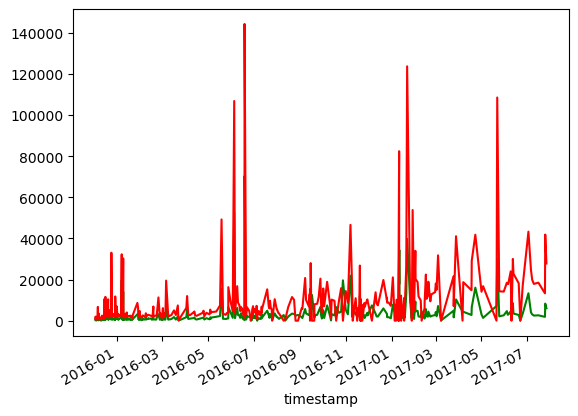

In [ ]:
rate_dog['retweet_count'].plot(color='green',label='Retweets')
rate_dog['favorite_count'].plot(color='red',label='Favorite')